In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np


In [10]:
!unzip /content/drive/MyDrive/Colab_Notebooks/symbols.zip

Streaming output truncated to the last 5000 lines.
  inflating: symbols/dot-0294.png    
  inflating: symbols/8-0708.png      
  inflating: symbols/2-0870.png      
  inflating: symbols/9-0052.png      
  inflating: symbols/z-1286.png      
  inflating: symbols/minus-0710.png  
  inflating: symbols/x-0134.png      
  inflating: symbols/z-0198.png      
  inflating: symbols/w-0511.png      
  inflating: symbols/1-1240.png      
  inflating: symbols/6-0477.png      
  inflating: symbols/2-0680.png      
  inflating: symbols/7-0305.png      
  inflating: symbols/2-0858.png      
  inflating: symbols/8-0720.png      
  inflating: symbols/y-0646.png      
  inflating: symbols/8-0046.png      
  inflating: symbols/slash-1063.png  
  inflating: symbols/y-0120.png      
  inflating: symbols/0-1254.png      
  inflating: symbols/7-0463.png      
  inflating: symbols/8-1358.png      
  inflating: symbols/3-0694.png      
  inflating: symbols/w-0277.png      
  inflating: symbols/6-0311.png      

In [11]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class SymbolDataset(Dataset):

    def __init__(self, data_dir, transform=None):
        self.image_paths = os.listdir(data_dir)
        self.labels = []
        self.find_labels()
        self.transform = transform



    def __len__(self):
        return len(self.image_paths)

    def find_labels(self):
        for img in self.image_paths:
            label = img.split('-')[0]
            self.labels.append(label)
        self.labels = [l.replace('x','10') for l in self.labels]
        self.labels = [l.replace('y','11') for l in self.labels]
        self.labels = [l.replace('z','12') for l in self.labels]
        self.labels = [l.replace('w','13') for l in self.labels]
        self.labels = [l.replace('plus','14') for l in self.labels]
        self.labels = [l.replace('slash','15') for l in self.labels]
        self.labels = [l.replace('minus','16') for l in self.labels]
        self.labels = [l.replace('dot','17') for l in self.labels]

        self.labels = list(map(int,self.labels))
        self.labels = torch.tensor(self.labels)


    def __getitem__(self, idx):
        img_path = os.path.join(data_dir, self.image_paths[idx])
        image = Image.open(img_path)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Example usage
data_dir = "/content/symbols"
dataset = SymbolDataset(data_dir,transform=transforms.ToTensor())

print(dataset)

In [12]:
train_data, remaining_data = torch.utils.data.random_split(dataset, [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))])
test_data, val_data = torch.utils.data.random_split(remaining_data, [int(0.5 * len(remaining_data)), len(remaining_data) - int(0.5 * len(remaining_data))])

print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(test_data)}")
print(f"Test data size: {len(val_data)}")

Train data size: 21600
Validation data size: 2700
Test data size: 2700


In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=1)
test_dataloader = DataLoader(test_data,batch_size=1)
val_dataloader = DataLoader(val_data,batch_size=1)

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt
def plot_histogram(datasets, title):
    labels = []
    for _, label in datasets:
        labels.append(label.item())

    plt.title(title)
    g = sn.histplot(data=labels,bins=18);
    plt.xlabel("Class")
    plt.ylabel("Counts")
    g.set_xticks(range(19))


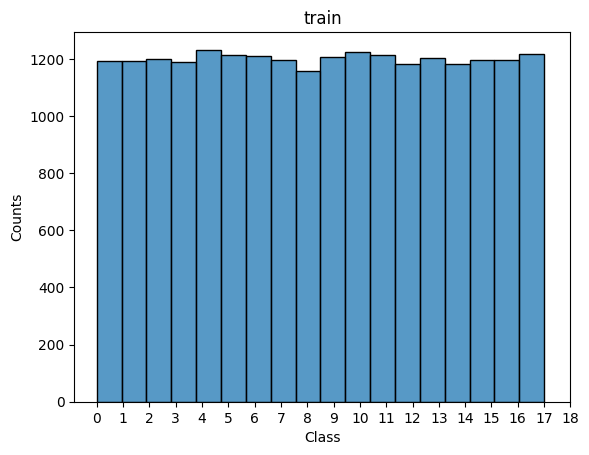

In [87]:
plot_histogram(train_data, "train")

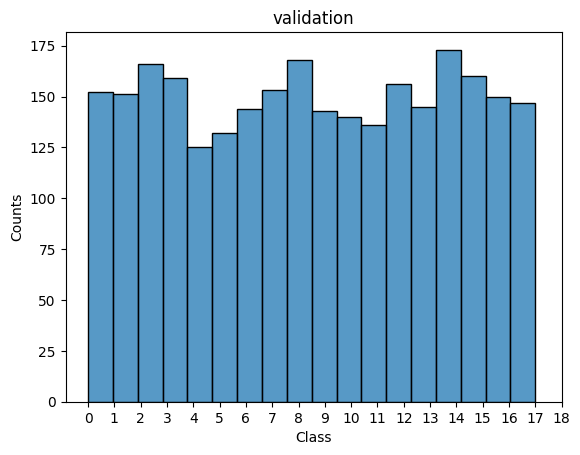

In [88]:
plot_histogram(test_data, "validation")

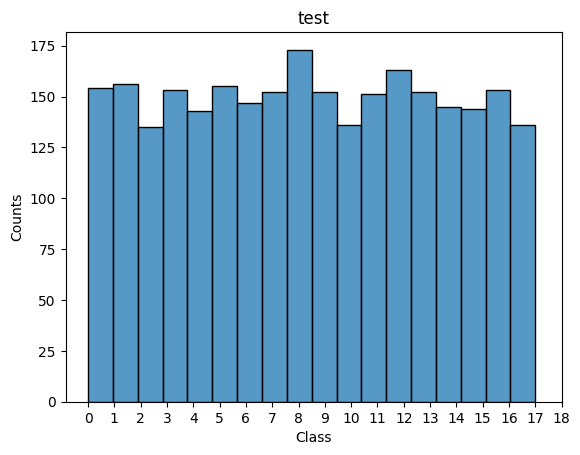

In [89]:
plot_histogram(val_data, "test")

از هر کلاسی تعدا متفاوتی میتونه باشه و اینجوری یه کلاس خوب train میشه و یه کلاس دیگه نه.

In [6]:
from pathlib import Path
import random
import shutil

src_dir = Path("/content/symbols")
dest_dir = Path("/content/NewData/")

# Ensure destination directory doesn't exist
dest_dir.mkdir(parents=True, exist_ok=True)

# Define subdirectories
subdirs = {"train": 0.8, "test": 0.1, "val": 0.1}

# Get all files in source directory
all_files = list(src_dir.glob("*"))

# Randomly shuffle files
random.shuffle(all_files)

# Split files based on ratios
file_splits = {}
current_idx = 0
for subdir, ratio in subdirs.items():
  split_count = int(len(all_files) * ratio)
  file_splits[subdir] = all_files[current_idx:current_idx + split_count]
  current_idx += split_count

# Create subdirectories and copy files
for subdir, files in file_splits.items():
  subdirectory = dest_dir / subdir
  subdirectory.mkdir(exist_ok=True)
  for file in files:
    shutil.copy(file, subdirectory)

print("Data split and copied successfully!")


Data split and copied successfully!


In [ ]:
train_set = SymbolDataset("/content/NewData/train", transform=transforms.ToTensor())
test_set = SymbolDataset("/content/NewData/test", transform=transforms.ToTensor())
val_set = SymbolDataset("/content/NewData/val", transform=transforms.ToTensor())

In [ ]:
# define new dataloaders
train_dataloader = DataLoader(train_set,batch_size=1)
test_dataloader = DataLoader(test_set,batch_size=1)
val_dataloader = DataLoader(val_set,batch_size=1)

In [ ]:
plot_histogram(train_set, "train")

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linearstack = nn.Sequential(
            nn.Linear(784, 18),
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.linearstack(x)

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linearstack): Sequential(
    (0): Linear(in_features=784, out_features=18, bias=True)
  )
)


In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(params=model.parameters(), lr=0.00001)

In [8]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [1]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [115]:
from tqdm import tqdm

epochs = 5
for t in tqdm(range(epochs)):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------
loss: 3.580098  [    1/21600]
loss: 2.858847  [  101/21600]
loss: 4.067851  [  201/21600]
loss: 4.097056  [  301/21600]
loss: 2.393665  [  401/21600]
loss: 3.991507  [  501/21600]
loss: 2.470053  [  601/21600]
loss: 3.165233  [  701/21600]
loss: 2.407207  [  801/21600]
loss: 2.985018  [  901/21600]
loss: 3.371950  [ 1001/21600]
loss: 3.386817  [ 1101/21600]
loss: 3.746662  [ 1201/21600]
loss: 2.577381  [ 1301/21600]
loss: 3.464242  [ 1401/21600]
loss: 2.585956  [ 1501/21600]
loss: 3.059119  [ 1601/21600]
loss: 3.103893  [ 1701/21600]
loss: 2.339021  [ 1801/21600]
loss: 2.808336  [ 1901/21600]
loss: 2.648011  [ 2001/21600]
loss: 2.266634  [ 2101/21600]
loss: 3.147458  [ 2201/21600]
loss: 3.701189  [ 2301/21600]
loss: 3.860234  [ 2401/21600]
loss: 3.612804  [ 2501/21600]
loss: 2.586361  [ 2601/21600]
loss: 2.464075  [ 2701/21600]
loss: 2.731078  [ 2801/21600]
loss: 3.879722  [ 2901/21600]
loss: 3.067374  [ 3001/21600]
loss: 3.790608  [ 3101/21600]


 20%|██        | 1/5 [00:27<01:51, 27.86s/it]

Test Error: 
 Accuracy: 6.6%, Avg loss: 3.033585 

Epoch 2
-------------------------------
loss: 3.580098  [    1/21600]
loss: 2.858847  [  101/21600]
loss: 4.067851  [  201/21600]
loss: 4.097056  [  301/21600]
loss: 2.393665  [  401/21600]
loss: 3.991507  [  501/21600]
loss: 2.470053  [  601/21600]
loss: 3.165233  [  701/21600]
loss: 2.407207  [  801/21600]
loss: 2.985018  [  901/21600]
loss: 3.371950  [ 1001/21600]
loss: 3.386817  [ 1101/21600]
loss: 3.746662  [ 1201/21600]
loss: 2.577381  [ 1301/21600]
loss: 3.464242  [ 1401/21600]
loss: 2.585956  [ 1501/21600]
loss: 3.059119  [ 1601/21600]
loss: 3.103893  [ 1701/21600]
loss: 2.339021  [ 1801/21600]
loss: 2.808336  [ 1901/21600]
loss: 2.648011  [ 2001/21600]
loss: 2.266634  [ 2101/21600]
loss: 3.147458  [ 2201/21600]
loss: 3.701189  [ 2301/21600]
loss: 3.860234  [ 2401/21600]
loss: 3.612804  [ 2501/21600]
loss: 2.586361  [ 2601/21600]
loss: 2.464075  [ 2701/21600]
loss: 2.731078  [ 2801/21600]
loss: 3.879722  [ 2901/21600]
loss: 3.0

 40%|████      | 2/5 [00:54<01:21, 27.23s/it]

Test Error: 
 Accuracy: 6.6%, Avg loss: 3.033585 

Epoch 3
-------------------------------
loss: 3.580098  [    1/21600]
loss: 2.858847  [  101/21600]
loss: 4.067851  [  201/21600]
loss: 4.097056  [  301/21600]
loss: 2.393665  [  401/21600]
loss: 3.991507  [  501/21600]
loss: 2.470053  [  601/21600]
loss: 3.165233  [  701/21600]
loss: 2.407207  [  801/21600]
loss: 2.985018  [  901/21600]
loss: 3.371950  [ 1001/21600]
loss: 3.386817  [ 1101/21600]
loss: 3.746662  [ 1201/21600]
loss: 2.577381  [ 1301/21600]
loss: 3.464242  [ 1401/21600]
loss: 2.585956  [ 1501/21600]
loss: 3.059119  [ 1601/21600]
loss: 3.103893  [ 1701/21600]
loss: 2.339021  [ 1801/21600]
loss: 2.808336  [ 1901/21600]
loss: 2.648011  [ 2001/21600]
loss: 2.266634  [ 2101/21600]
loss: 3.147458  [ 2201/21600]
loss: 3.701189  [ 2301/21600]
loss: 3.860234  [ 2401/21600]
loss: 3.612804  [ 2501/21600]
loss: 2.586361  [ 2601/21600]
loss: 2.464075  [ 2701/21600]
loss: 2.731078  [ 2801/21600]
loss: 3.879722  [ 2901/21600]
loss: 3.0

 60%|██████    | 3/5 [01:21<00:54, 27.02s/it]

Test Error: 
 Accuracy: 6.6%, Avg loss: 3.033585 

Epoch 4
-------------------------------
loss: 3.580098  [    1/21600]
loss: 2.858847  [  101/21600]
loss: 4.067851  [  201/21600]
loss: 4.097056  [  301/21600]
loss: 2.393665  [  401/21600]
loss: 3.991507  [  501/21600]
loss: 2.470053  [  601/21600]
loss: 3.165233  [  701/21600]
loss: 2.407207  [  801/21600]
loss: 2.985018  [  901/21600]
loss: 3.371950  [ 1001/21600]
loss: 3.386817  [ 1101/21600]
loss: 3.746662  [ 1201/21600]
loss: 2.577381  [ 1301/21600]
loss: 3.464242  [ 1401/21600]
loss: 2.585956  [ 1501/21600]
loss: 3.059119  [ 1601/21600]
loss: 3.103893  [ 1701/21600]
loss: 2.339021  [ 1801/21600]
loss: 2.808336  [ 1901/21600]
loss: 2.648011  [ 2001/21600]
loss: 2.266634  [ 2101/21600]
loss: 3.147458  [ 2201/21600]
loss: 3.701189  [ 2301/21600]
loss: 3.860234  [ 2401/21600]
loss: 3.612804  [ 2501/21600]
loss: 2.586361  [ 2601/21600]
loss: 2.464075  [ 2701/21600]
loss: 2.731078  [ 2801/21600]
loss: 3.879722  [ 2901/21600]
loss: 3.0

 80%|████████  | 4/5 [01:47<00:26, 26.82s/it]

Test Error: 
 Accuracy: 6.6%, Avg loss: 3.033585 

Epoch 5
-------------------------------
loss: 3.580098  [    1/21600]
loss: 2.858847  [  101/21600]
loss: 4.067851  [  201/21600]
loss: 4.097056  [  301/21600]
loss: 2.393665  [  401/21600]
loss: 3.991507  [  501/21600]
loss: 2.470053  [  601/21600]
loss: 3.165233  [  701/21600]
loss: 2.407207  [  801/21600]
loss: 2.985018  [  901/21600]
loss: 3.371950  [ 1001/21600]
loss: 3.386817  [ 1101/21600]
loss: 3.746662  [ 1201/21600]
loss: 2.577381  [ 1301/21600]
loss: 3.464242  [ 1401/21600]
loss: 2.585956  [ 1501/21600]
loss: 3.059119  [ 1601/21600]
loss: 3.103893  [ 1701/21600]
loss: 2.339021  [ 1801/21600]
loss: 2.808336  [ 1901/21600]
loss: 2.648011  [ 2001/21600]
loss: 2.266634  [ 2101/21600]
loss: 3.147458  [ 2201/21600]
loss: 3.701189  [ 2301/21600]
loss: 3.860234  [ 2401/21600]
loss: 3.612804  [ 2501/21600]
loss: 2.586361  [ 2601/21600]
loss: 2.464075  [ 2701/21600]
loss: 2.731078  [ 2801/21600]
loss: 3.879722  [ 2901/21600]
loss: 3.0

100%|██████████| 5/5 [02:13<00:00, 26.73s/it]

Test Error: 
 Accuracy: 6.6%, Avg loss: 3.033585 

Done!


In [7]:
class Model_c(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Conv2d(input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),

            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),

            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        return self.seq(x)

NameError: name 'nn' is not defined

از CrossEntropyLoss در یادگیری ماشین برای اندازه‌گیری عملکرد مدل‌های طبقه‌بندی استفاده می‌شود. این تابع به طور خاص دو توزیع احتمالی را مقایسه می‌کند: توزیع پیش‌بینی‌شده توسط مدل و توزیع واقعی (هدف).

دلایل استفاده از CrossEntropyLoss:

1. سادگی: CrossEntropyLoss از نظر ریاضی ساده و قابل فهم است. این امر آن را به یک انتخاب محبوب برای مبتدیان و متخصصان باتجربه تبدیل می‌کند.

2. کارایی: CrossEntropyLoss به طور کارآمد محاسبه می‌شود و می‌تواند به سرعت برای مجموعه‌های داده‌های بزرگ آموزش ببیند.

3. تفسیر: CrossEntropyLoss را می‌توان به طور مستقیم به عنوان میانگین تعداد بیت‌های مورد نیاز برای رمزگذاری اطلاعات واقعی با استفاده از توزیع پیش‌بینی‌شده تفسیر کرد. این تفسیر ساده به درک نحوه عملکرد مدل و شناسایی زمینه‌هایی برای بهبود کمک می‌کند.

4. عملکرد: CrossEntropyLoss در طیف گسترده‌ای از وظایف طبقه‌بندی، از جمله تشخیص تصویر، پردازش زبان طبیعی و تشخیص گفتار، عملکرد خوبی دارد.

کاربردهای CrossEntropyLoss:

طبقه‌بندی دودویی: برای تمایز بین دو کلاس، مانند "گربه" در مقابل "سگ".
طبقه‌بندی چند کلاسه: برای تمایز بین سه یا چند کلاس، مانند "سیب" در مقابل "موز" در مقابل "پرتقال".
رگرسیون چند کلاسه: برای پیش‌بینی توزیع احتمالی کلاس‌ها، مانند پیش‌بینی احتمال اینکه یک ایمیل اسپم باشد یا نباشد.
نکاتی در مورد استفاده از CrossEntropyLoss:

CrossEntropyLoss فرض می‌کند که کلاس‌ها مستقل هستند. اگر کلاس‌ها به هم مرتبط باشند، ممکن است لازم باشد از تابع ضرر دیگری استفاده کنید.
CrossEntropyLoss به داده‌های برچسب‌گذاری شده با کیفیت بالا نیاز دارد. اگر داده‌های شما برچسب‌گذاری ضعیفی دارند، ممکن است لازم باشد از تکنیک‌های پیش پردازش داده مانند نمونه‌گیری بیش از حد یا نمونه‌گیری کم استفاده کنید.
CrossEntropyLoss ممکن است به مدل‌های بیش‌آموزی حساس باشد. برای کاهش خطر بیش‌آموزی، می‌توانید از تکنیک‌های تنظیم مانند رها کردن یا افزایش داده استفاده کنید.
در مجموع، CrossEntropyLoss یک تابع ضرر قدرتمند و همه‌کاره است که برای طیف گسترده‌ای از وظایف طبقه‌بندی مفید است. سادگی، کارایی، تفسیر و عملکرد آن را به یک انتخاب محبوب برای محققان و مهندسان یادگیری ماشین تبدیل می‌کند.

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(params=model.parameters(), lr=0.0001)

In [ ]:
# one epoch
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [20]:
def train(model, data_loader, epochs, loss_fn, optimizer, device):


  for epoch in range(epochs):
    print(f"epoch {epoch + 1}")
    running_loss = 0.0
    for i, (data, labels) in enumerate(data_loader):
      data = data.to(device)
      labels = labels.to(device)

      with torch.no_grad():
        predictions = model(data)

      loss = loss_fn(predictions, labels)
      running_loss += loss.item()

      optimizer.zero_grad()

      loss.backward()

      optimizer.step()

      if i % 100 == 0:
        print(f"[{epoch + 1}, {i + 1:4d}] loss: {loss.item():.6f}")

    epoch_loss = running_loss / len(data_loader)
    print(f" {epoch + 1}: {epoch_loss:.6f}")

  return model

In [1]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.2 MB/s eta 0:00:00


In [2]:
import wandb

In [4]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
sweep_config = {
    'method': 'grid',
    'parameters': {
        'learning_rate': {
            'values': [0.01, 0.0001]
        },
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, project='Computational intelligence')

In [ ]:
from engine import train_step
import engine
def Wtrain(config=None , model = Model_v2 , train_loader = train_dataloader  , val_loader = val_dataloader, loss_fn = loss_fn):
    with wandb.init(config=config):
        config = wandb.config

        results = train(model , train_loader , val_loader , torch.optim.AdamW(model.parameters(), lr = sweep_config.learning_rate), loss_fn,10,'cpu')
        wandb.log(results)

In [ ]:
wandb.agent(sweep_id , Wtrain , count=5)